In [1]:
#importing modules in python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_data = pd.read_csv(url, names=column_names)

print("Display the first few rows of the dataset\n")
print(iris_data.head())
print("\n---------------------------------------------\n")
print("Explore dataset statistics\n")
print(iris_data.describe())
print("\n---------------------------------------------\n")
print("\ninfo related to dataset\n")
print(iris_data.info())
print("\n---------------------------------------------\n")
print("\nto display number of rows and columns")
print(iris_data.shape)
print("\n---------------------------------------------\n")

Display the first few rows of the dataset

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

---------------------------------------------

Explore dataset statistics

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000 

In [3]:
#display top 5 records from iris_data
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


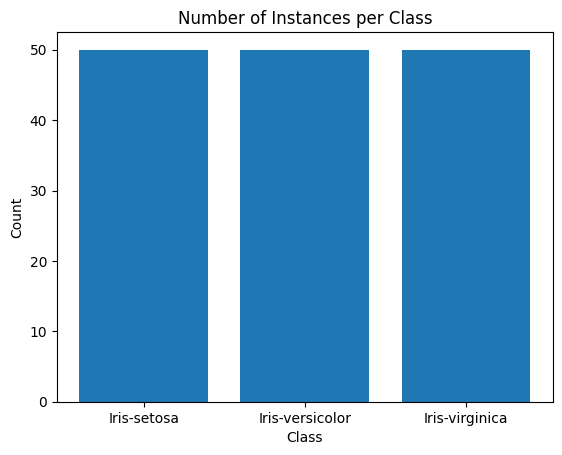

In [4]:
class_counts = iris_data['class'].value_counts()

# Create a bar plot to display the class counts
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Instances per Class')
plt.show()

In [5]:
# Separate features and target variable
X = iris_data.drop('class', axis=1)
y = iris_data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Train the K-Nearest Neighbors classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)


# Evaluate the model
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))
print("\n----------------------------------------------\n")
print("Classification report")
print(classification_report(y_test, y_pred))
print("\n-----------------------------------------------\n")
print("Accuracy score")
print(accuracy_score(y_pred,y_test)*100,"%")

Confusion matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

----------------------------------------------

Classification report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


-----------------------------------------------

Accuracy score
100.0 %


In [9]:
# Create a new instance for prediction

new_instance = [[5.1, 3.5, 1.4, 0.2]]

# Scale the new instance using the same scaler
new_instance_scaled = scaler.transform(new_instance)

# Make a prediction on the new instance
predicted_class = knn.predict(new_instance_scaled)
print(f"Predicted class: {predicted_class[0]}")


Predicted class: Iris-setosa


C:\Users\tumat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
